# Evaluating a Function that Extracts Project Names from Customer Emails

The same test as you can find in [project_name_extractor_evaluation/03.1_evaluate_function_without_donation.ipynb](03.1_evaluate_function_without_donation.ipynb). The similarity threshold for the function is 0.185

In [22]:
import pandas as pd
from tqdm import tqdm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from services.content.project_identifier_service import ProjectIdentifierService
from project_name_extractor_utils import get_project_list
from dtos.project import Project

from importlib import reload
from dtos.identified_project import IdentifiedProject

In [23]:
similarity_threshold: float = 0.185
ground_truth_csv_path = "/home/jovyan/work/notebook/project_name_extractor_evaluation/ground_truth.csv"

In [24]:
# Read Ground Truth CSV Data
data = pd.read_csv(ground_truth_csv_path, delimiter=";")

# Load the data into a DataFrame
df = pd.DataFrame(data)

Replace "NaN" with an empty string in the expected project names to avoid issues with comparison.

In [25]:
df = df.fillna("")

In [26]:
df

,source_system,project_id,project_name,subject,body
0,evdi,54EE27F7-BFB3-49BD-9438-2BE412C8D8A0,DFI Zukunftspark Oberfranken VI,Welche Sicherheiten bietet das Projekt DFI Zuk...,"Können Sie mir bitte mitteilen, welche Sicherh..."
1,evdi,54EE27F7-BFB3-49BD-9438-2BE412C8D8A0,DFI Zukunftspark Oberfranken VI,Wie ist die Verzinsung für Investoren im Proje...,Ich interessiere mich für die Verzinsung beim ...
2,evdi,54EE27F7-BFB3-49BD-9438-2BE412C8D8A0,DFI Zukunftspark Oberfranken VI,Fragen zur Infrastruktur im Projekt DFI Zukunf...,"Ich möchte wissen, welche infrastrukturellen E..."
3,evdi,54EE27F7-BFB3-49BD-9438-2BE412C8D8A0,DFI Zukunftspark Oberfranken VI,Projektlaufzeit und Rückzahlung im DFI Zukunft...,Wie lange ist die geplante Projektlaufzeit bei...
4,evdi,54EE27F7-BFB3-49BD-9438-2BE412C8D8A0,DFI Zukunftspark Oberfranken VI,Welche Sicherheiten gibt es im DFI Zukunftspar...,"Mich würde interessieren, welche Sicherheiten ..."
...,...,...,...,...,...
207,evdi,,,Wann erfolgt die Zinsauszahlung?,Wann werden die Zinszahlungen für mein Investm...
208,evdi,,,Wann beginnt die Verzinsung meines Investments?,Wann beginnt die Verzinsung meiner Investition...
209,evdi,,,Welche Infrastrukturmaßnahmen sind im Projekt ...,Welche Infrastrukturmaßnahmen werden im Rahmen...
210,evdi,,,Wann beginnt die Rückzahlung meines Investments?,Wann wird die Rückzahlung meines Investments e...


In [27]:
projects = get_project_list()
filtered_project_names = [project.name for project in projects if 'Spendenprojekt - Green Forest Fund' not in project.name]
project_identifier_service = ProjectIdentifierService(filtered_project_names)

In [28]:
filtered_project_names

['DFI Zukunftspark Oberfranken VI',
 'Berliner Flair in Friedrichshain II',
 'DFI Zukunftspark Nordbayern IV',
 'DFI Zukunftspark Oberfranken V',
 'Am Akkonplatz',
 'Berliner Flair in Friedrichshain',
 'DFI Zukunftspark Oberfranken IV',
 'Tonhallen-Passage II',
 'DFI Zukunftspark Nordbayern III',
 'DFI Zukunftspark Oberfranken III',
 'DFI Zukunftspark Dreiländereck II',
 'Friedrichstraße 191 III',
 'Office am Europaring IV',
 'DFI Zukunftspark Mittelfranken',
 'Wohnquartier Pasing II',
 'DFI Zukunftspark Dreiländereck',
 'smart-UP Self-Storage-Park III',
 'Stadthaus Mozart IV',
 'Stadthaus Mozart III',
 'Büro-Hochhaus am Scheidemannplatz II',
 'smartUP Self-Storage-Park II',
 'Jugendstil-Altbau am Rothenbaum II',
 'Stadtleben Altlindenau',
 'An der Kleinen Weser',
 'Modernes Wohnen am Nymphenburger Kanal II',
 'Atelier-Wohnungen an der Burg II',
 'Eco Living Lichtenrade',
 'The Five',
 'Elegantes Wohnen nahe der Isar',
 'Solarpark Eyendorf',
 'DFI Zukunftspark Oberrhein II',
 'DFI Zuku

In [29]:

for idx, row in tqdm(df.iterrows(), total=df.shape[0]):
    row_as_dict = row.to_dict()
    input_text = (row_as_dict["subject"] + " " + row_as_dict["body"]).strip()
    extracted_project: IdentifiedProject = project_identifier_service.extract_project(input_text, similarity_threshold)
    if extracted_project == None:
        df.at[idx, "extracted_project_name"] = ""
        continue

    df.at[idx, "extracted_project_name"] = extracted_project.name
    df.at[idx, "extracted_project_similarity"] = extracted_project.similarity

  0%|          | 0/212 [00:00<?, ?it/s]

100%|██████████| 212/212 [08:36<00:00,  2.44s/it]


In [30]:
df

,source_system,project_id,project_name,subject,body,extracted_project_name,extracted_project_similarity
0,evdi,54EE27F7-BFB3-49BD-9438-2BE412C8D8A0,DFI Zukunftspark Oberfranken VI,Welche Sicherheiten bietet das Projekt DFI Zuk...,"Können Sie mir bitte mitteilen, welche Sicherh...",DFI Zukunftspark Oberfranken,0.414092
1,evdi,54EE27F7-BFB3-49BD-9438-2BE412C8D8A0,DFI Zukunftspark Oberfranken VI,Wie ist die Verzinsung für Investoren im Proje...,Ich interessiere mich für die Verzinsung beim ...,DFI Zukunftspark Oberfranken IV,0.433192
2,evdi,54EE27F7-BFB3-49BD-9438-2BE412C8D8A0,DFI Zukunftspark Oberfranken VI,Fragen zur Infrastruktur im Projekt DFI Zukunf...,"Ich möchte wissen, welche infrastrukturellen E...",DFI Zukunftspark Oberfranken,0.494035
3,evdi,54EE27F7-BFB3-49BD-9438-2BE412C8D8A0,DFI Zukunftspark Oberfranken VI,Projektlaufzeit und Rückzahlung im DFI Zukunft...,Wie lange ist die geplante Projektlaufzeit bei...,DFI Zukunftspark Oberfranken VI,0.413225
4,evdi,54EE27F7-BFB3-49BD-9438-2BE412C8D8A0,DFI Zukunftspark Oberfranken VI,Welche Sicherheiten gibt es im DFI Zukunftspar...,"Mich würde interessieren, welche Sicherheiten ...",DFI Zukunftspark Oberfranken VI,0.482045
...,...,...,...,...,...,...,...
207,evdi,,,Wann erfolgt die Zinsauszahlung?,Wann werden die Zinszahlungen für mein Investm...,,NaN
208,evdi,,,Wann beginnt die Verzinsung meines Investments?,Wann beginnt die Verzinsung meiner Investition...,,NaN
209,evdi,,,Welche Infrastrukturmaßnahmen sind im Projekt ...,Welche Infrastrukturmaßnahmen werden im Rahmen...,,NaN
210,evdi,,,Wann beginnt die Rückzahlung meines Investments?,Wann wird die Rückzahlung meines Investments e...,,NaN


In [31]:
# Ground truth and predictions
y_true = df['project_name']
y_pred = df['extracted_project_name']

# Compute metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average="macro")
recall = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')

# Print results
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.7971698113207547
Precision: 0.8825281803542673
Recall: 0.8003968253968254
F1 Score: 0.8031522710094139


/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Analyze the results

Find rows where the values are not the same

In [43]:
mask = df["project_name"] != df["extracted_project_name"]
different_values_df = df[mask]
len(different_values_df)

43

In [44]:
different_values_df

,source_system,project_id,project_name,subject,body,extracted_project_name,extracted_project_similarity
0,evdi,54EE27F7-BFB3-49BD-9438-2BE412C8D8A0,DFI Zukunftspark Oberfranken VI,Welche Sicherheiten bietet das Projekt DFI Zuk...,"Können Sie mir bitte mitteilen, welche Sicherh...",DFI Zukunftspark Oberfranken,0.414092
1,evdi,54EE27F7-BFB3-49BD-9438-2BE412C8D8A0,DFI Zukunftspark Oberfranken VI,Wie ist die Verzinsung für Investoren im Proje...,Ich interessiere mich für die Verzinsung beim ...,DFI Zukunftspark Oberfranken IV,0.433192
2,evdi,54EE27F7-BFB3-49BD-9438-2BE412C8D8A0,DFI Zukunftspark Oberfranken VI,Fragen zur Infrastruktur im Projekt DFI Zukunf...,"Ich möchte wissen, welche infrastrukturellen E...",DFI Zukunftspark Oberfranken,0.494035
12,evdi,E2FEFD3E-6841-434F-AF12-6E700D7C60D3,DFI Zukunftspark Nordbayern IV,Welche Rendite erwartet mich bei DFI Zukunftsp...,"Ich würde gerne wissen, welche Rendite ich bei...",DFI Zukunftspark Nordbayern II,0.426020
13,evdi,E2FEFD3E-6841-434F-AF12-6E700D7C60D3,DFI Zukunftspark Nordbayern IV,Wie sicher ist mein Investment bei DFI Zukunft...,Könnten Sie mir bitte Informationen zu den Sic...,DFI Zukunftspark Nordbayern II,0.428162
14,evdi,E2FEFD3E-6841-434F-AF12-6E700D7C60D3,DFI Zukunftspark Nordbayern IV,Wie ist die Verzinsung für mein Investment?,Ich würde gerne mehr über die Verzinsung bei m...,DFI Zukunftspark Nordbayern II,0.361636
18,evdi,D1F21F84-9EEC-4D0B-A63A-BF656A28A256,DFI Zukunftspark Oberfranken V,Wie hoch ist der Zinssatz bei DFI Zukunftspark...,"Ich möchte wissen, welcher Zinssatz bei meinem...",DFI Zukunftspark Oberfranken IV,0.401171
19,evdi,D1F21F84-9EEC-4D0B-A63A-BF656A28A256,DFI Zukunftspark Oberfranken V,Wie sicher ist das Investment im Projekt DFI Z...,Welche Sicherheitsmaßnahmen gibt es für dieses...,DFI Zukunftspark Oberfranken IV,0.351459
20,evdi,D1F21F84-9EEC-4D0B-A63A-BF656A28A256,DFI Zukunftspark Oberfranken V,Wann beginnt die Verzinsung?,Wann genau startet die Verzinsung meines Inves...,DFI Zukunftspark Oberfranken IV,0.287431
23,evdi,D1F21F84-9EEC-4D0B-A63A-BF656A28A256,DFI Zukunftspark Oberfranken V,Erhalte ich steuerliche Vorteile?,"Ich habe gehört, dass das Projekt DFI Zukunfts...",DFI Zukunftspark Oberfranken IV,0.405782


Let's investigate some of them:

In [33]:
expected_project_name = "Am Akkonplatz"
input_text = "Wie ist das Risiko beim Projekt Am Akkonplatz eingeschätzt? Wie wird das Risiko bei diesem Investment eingeschätzt? Gibt es Schutzmechanismen, um mein Kapital zu sichern, falls das Projekt nicht erfolgreich ist?"

extracted_project = project_identifier_service.extract_project(input_text)
extracted_project

In [34]:
expected_project_name = "Wohnquartier Pasing II"
input_text = "Fragen zur Projektlaufzeit und Auszahlungsmodalitäten Sehr geehrtes Projektteam, ich habe einige Fragen bezüglich der zeitlichen Aspekte und Auszahlungsmodalitäten des Investments. Wie lange ist die geplante Laufzeit des Wohnprojekts in Pasing? Ab wann können Investoren mit den ersten Ausschüttungen rechnen? Gibt es einen festen Auszahlungsplan oder sind die Zahlungen an bestimmte Meilensteine im Bauprozess geknüpft? Besteht die Möglichkeit einer vorzeitigen Kündigung oder eines Verkaufs der Anteile? Ich würde mich über detaillierte Informationen zu diesen Punkten sehr freuen, da sie für meine Investitionsplanung von großer Bedeutung sind. Das Projekt ist Wohnquartier Pasing II"

extracted_project = project_identifier_service.extract_project(input_text)
extracted_project

In [35]:
expected_project_name = "Büro-Hochhaus am Scheidemannplatz II"
input_text = "Sicherheiten und Risikoabsicherung beim Immobilieninvestment Sehr geehrte Damen und Herren, als potenzieller Investor möchte ich mich nach den Sicherheiten erkundigen, die Sie für Investments in Ihr Projekt bieten. Welche konkreten Maßnahmen haben Sie ergriffen, um das Risiko für Investoren zu minimieren? Gibt es eine Absicherung durch Grundbucheinträge oder andere rechtliche Konstrukte? Mich würde auch interessieren, wie Sie mit möglichen Verzögerungen im Bauprozess oder unerwarteten Kostensteigerungen umgehen. Beim Projekt Büro-Hochhaus am Scheidemannplatz II, wie stellen Sie sicher, dass die Interessen der Investoren gewahrt bleiben?"

extracted_project = project_identifier_service.extract_project(input_text)
extracted_project

Check how many unique project names are in the dataset and how often they appear:

In [36]:
print(df['project_name'].value_counts())

project_name
                                             24
DFI Zukunftspark Dreiländereck                8
DFI Zukunftspark Nordbayern IV                6
DFI Zukunftspark Oberfranken V                6
Am Akkonplatz                                 6
Berliner Flair in Friedrichshain              6
DFI Zukunftspark Oberfranken IV               6
DFI Zukunftspark Nordbayern III               6
DFI Zukunftspark Oberfranken VI               6
Berliner Flair in Friedrichshain II           6
smartUP Self-Storage-Park II                  6
DFI Zukunftspark Oberfranken III              6
Wohnquartier Pasing II                        6
DFI Zukunftspark Dreiländereck II             6
smart-UP Self-Storage-Park III                6
Stadthaus Mozart IV                           6
Büro-Hochhaus am Scheidemannplatz II          6
DFI Zukunftspark Mittelfranken                6
Stadthaus Mozart III                          6
Tonhallen-Passage II                          5
Stadthaus 'Mozart'         

Compare Predictions and Ground Truth:

In [37]:
mismatches = df[df['project_name'] != df['extracted_project_name']]
print(mismatches[['project_name', 'extracted_project_name']])

                             project_name               extracted_project_name
0         DFI Zukunftspark Oberfranken VI         DFI Zukunftspark Oberfranken
1         DFI Zukunftspark Oberfranken VI      DFI Zukunftspark Oberfranken IV
2         DFI Zukunftspark Oberfranken VI         DFI Zukunftspark Oberfranken
12         DFI Zukunftspark Nordbayern IV       DFI Zukunftspark Nordbayern II
13         DFI Zukunftspark Nordbayern IV       DFI Zukunftspark Nordbayern II
14         DFI Zukunftspark Nordbayern IV       DFI Zukunftspark Nordbayern II
18         DFI Zukunftspark Oberfranken V      DFI Zukunftspark Oberfranken IV
19         DFI Zukunftspark Oberfranken V      DFI Zukunftspark Oberfranken IV
20         DFI Zukunftspark Oberfranken V      DFI Zukunftspark Oberfranken IV
23         DFI Zukunftspark Oberfranken V      DFI Zukunftspark Oberfranken IV
24                          Am Akkonplatz                                     
25                          Am Akkonplatz           

## Examine Confusion Matrix

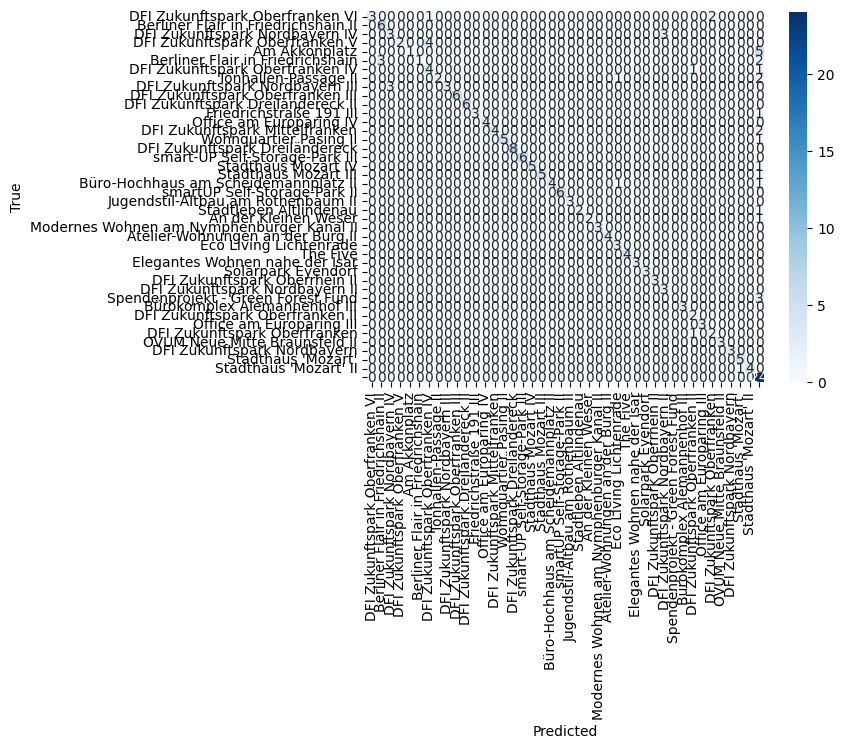

In [38]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred, labels=df['project_name'].unique())
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=df['project_name'].unique(), yticklabels=df['project_name'].unique())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## The similarity of the project names

In [39]:
mask = df["project_name"] == df["extracted_project_name"]
correct_predicted_values = df[mask]

correct_predicted_values

,source_system,project_id,project_name,subject,body,extracted_project_name,extracted_project_similarity
3,evdi,54EE27F7-BFB3-49BD-9438-2BE412C8D8A0,DFI Zukunftspark Oberfranken VI,Projektlaufzeit und Rückzahlung im DFI Zukunft...,Wie lange ist die geplante Projektlaufzeit bei...,DFI Zukunftspark Oberfranken VI,0.413225
4,evdi,54EE27F7-BFB3-49BD-9438-2BE412C8D8A0,DFI Zukunftspark Oberfranken VI,Welche Sicherheiten gibt es im DFI Zukunftspar...,"Mich würde interessieren, welche Sicherheiten ...",DFI Zukunftspark Oberfranken VI,0.482045
5,evdi,54EE27F7-BFB3-49BD-9438-2BE412C8D8A0,DFI Zukunftspark Oberfranken VI,Verzinsung und Projektdauer im DFI Zukunftspar...,Können Sie mir die Details zur Verzinsung und ...,DFI Zukunftspark Oberfranken VI,0.475351
6,evdi,716867B4-C28C-425E-94BE-59886D853D49,Berliner Flair in Friedrichshain II,Verkaufspreise für Wohnungen im Berliner Flair...,Ich würde gerne mehr über die geplanten Verkau...,Berliner Flair in Friedrichshain II,0.479871
7,evdi,716867B4-C28C-425E-94BE-59886D853D49,Berliner Flair in Friedrichshain II,Wie hoch sind die Zinsen im Berliner Flair in ...,Welche Verzinsung bietet das Projekt Berliner ...,Berliner Flair in Friedrichshain II,0.524845
...,...,...,...,...,...,...,...
207,evdi,,,Wann erfolgt die Zinsauszahlung?,Wann werden die Zinszahlungen für mein Investm...,,NaN
208,evdi,,,Wann beginnt die Verzinsung meines Investments?,Wann beginnt die Verzinsung meiner Investition...,,NaN
209,evdi,,,Welche Infrastrukturmaßnahmen sind im Projekt ...,Welche Infrastrukturmaßnahmen werden im Rahmen...,,NaN
210,evdi,,,Wann beginnt die Rückzahlung meines Investments?,Wann wird die Rückzahlung meines Investments e...,,NaN


In [40]:
similarity_min = df["extracted_project_similarity"].min()
similarity_min

np.float64(0.1888258010149002)

In [41]:
df["extracted_project_similarity"].describe()

count    166.000000
mean       0.359915
std        0.099804
min        0.188826
25%        0.276278
50%        0.351532
75%        0.429433
max        0.602253
Name: extracted_project_similarity, dtype: float64

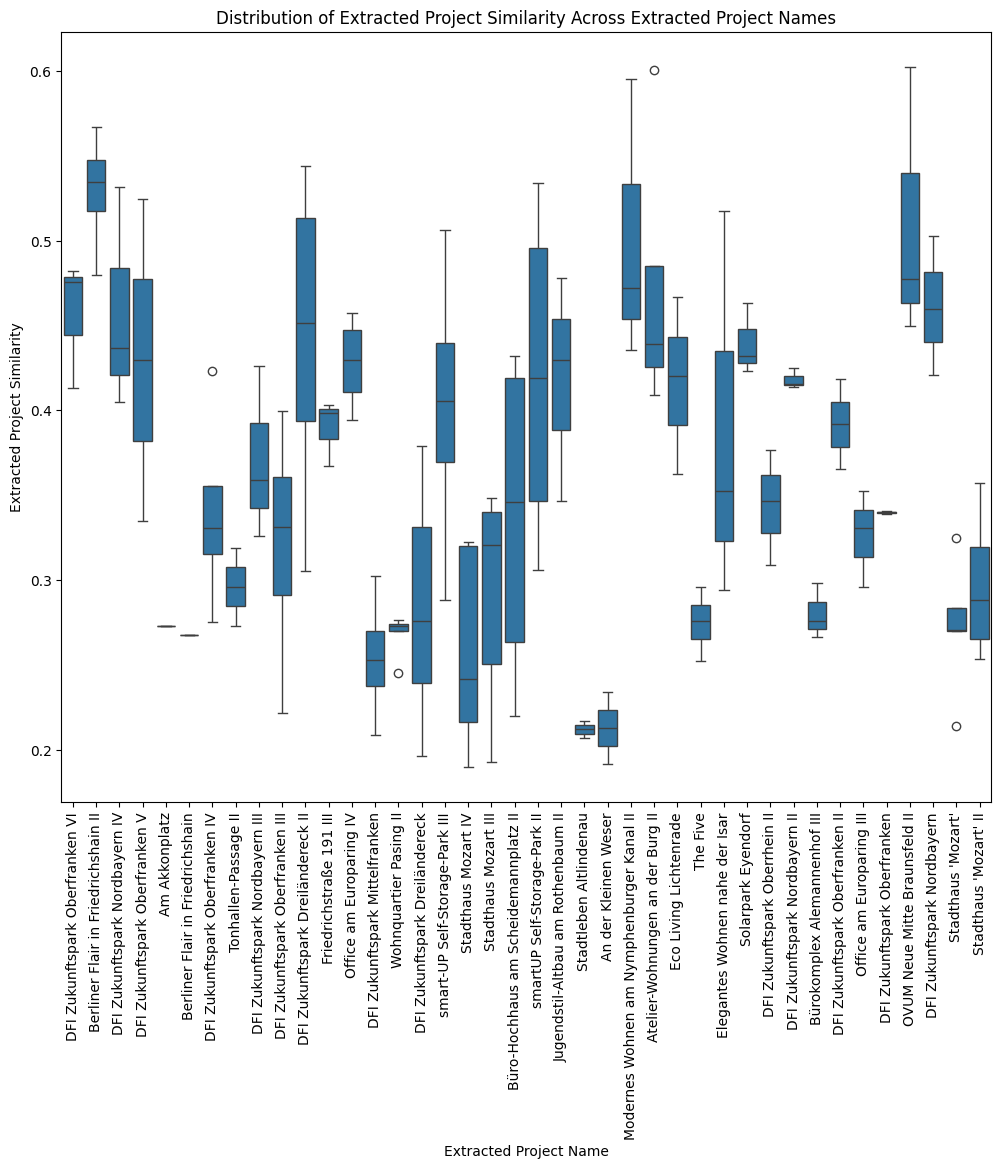

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter out rows where 'extracted_project_similarity' is NaN
df_filtered = correct_predicted_values[correct_predicted_values["extracted_project_similarity"].notna()]

# Set the figure size
plt.figure(figsize=(12, 10))

# Create a box plot
sns.boxplot(x="extracted_project_name", y="extracted_project_similarity", data=df_filtered)

# Optionally, create a violin plot instead of a box plot
# sns.violinplot(x="extracted_project_name", y="extracted_project_similarity", data=df_filtered)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Set plot title and labels
plt.title("Distribution of Extracted Project Similarity Across Extracted Project Names")
plt.xlabel("Extracted Project Name")
plt.ylabel("Extracted Project Similarity")

# Show the plot
plt.show()